# DBSCAN Project
#### Submitted by Maria Eloisa H. Garcia

---

## The df


Source: https://archive.ics.uci.edu/ml/dfsets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


df Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

**COMPLETE THE REQUIRED TASKS:**


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [144]:
df = pd.read_csv('Wholesale customers data.csv', sep=',', header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

<Axes: xlabel='Milk', ylabel='Grocery'>

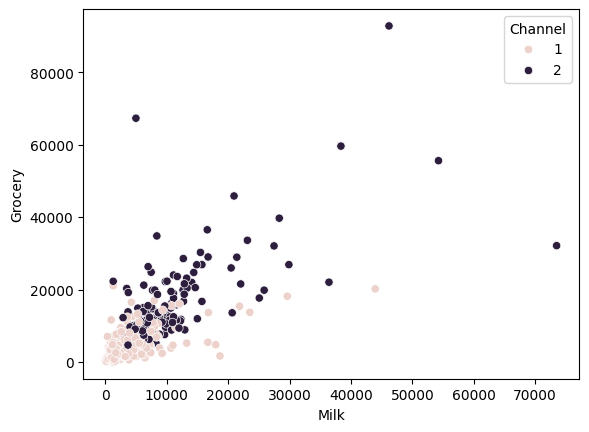

In [145]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

<Axes: xlabel='Milk', ylabel='Count'>

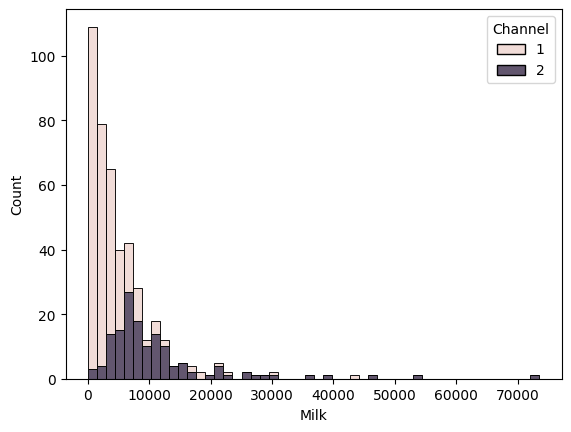

In [146]:
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack')

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

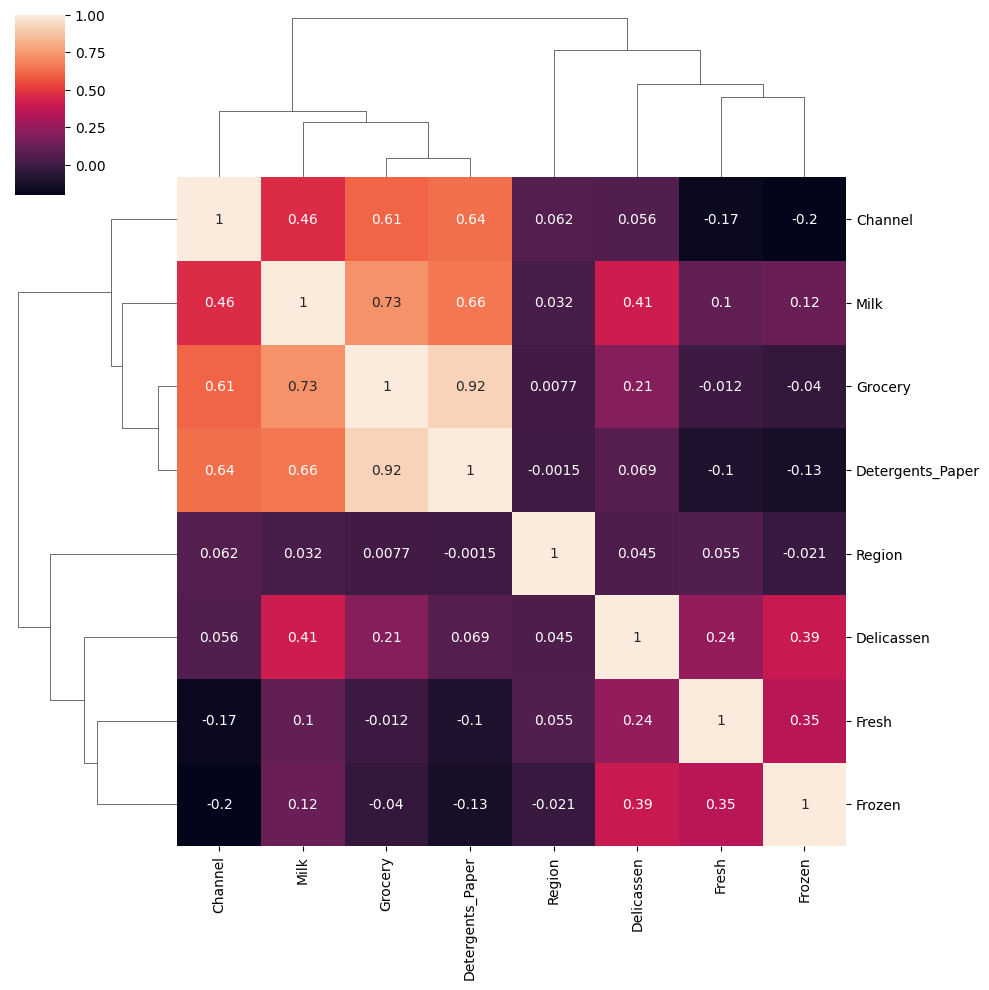

In [147]:
correlations = df.corr()
sns.clustermap(correlations, annot=True)

**TASK: Create a PairPlot of the dataframe, colored by Region.**

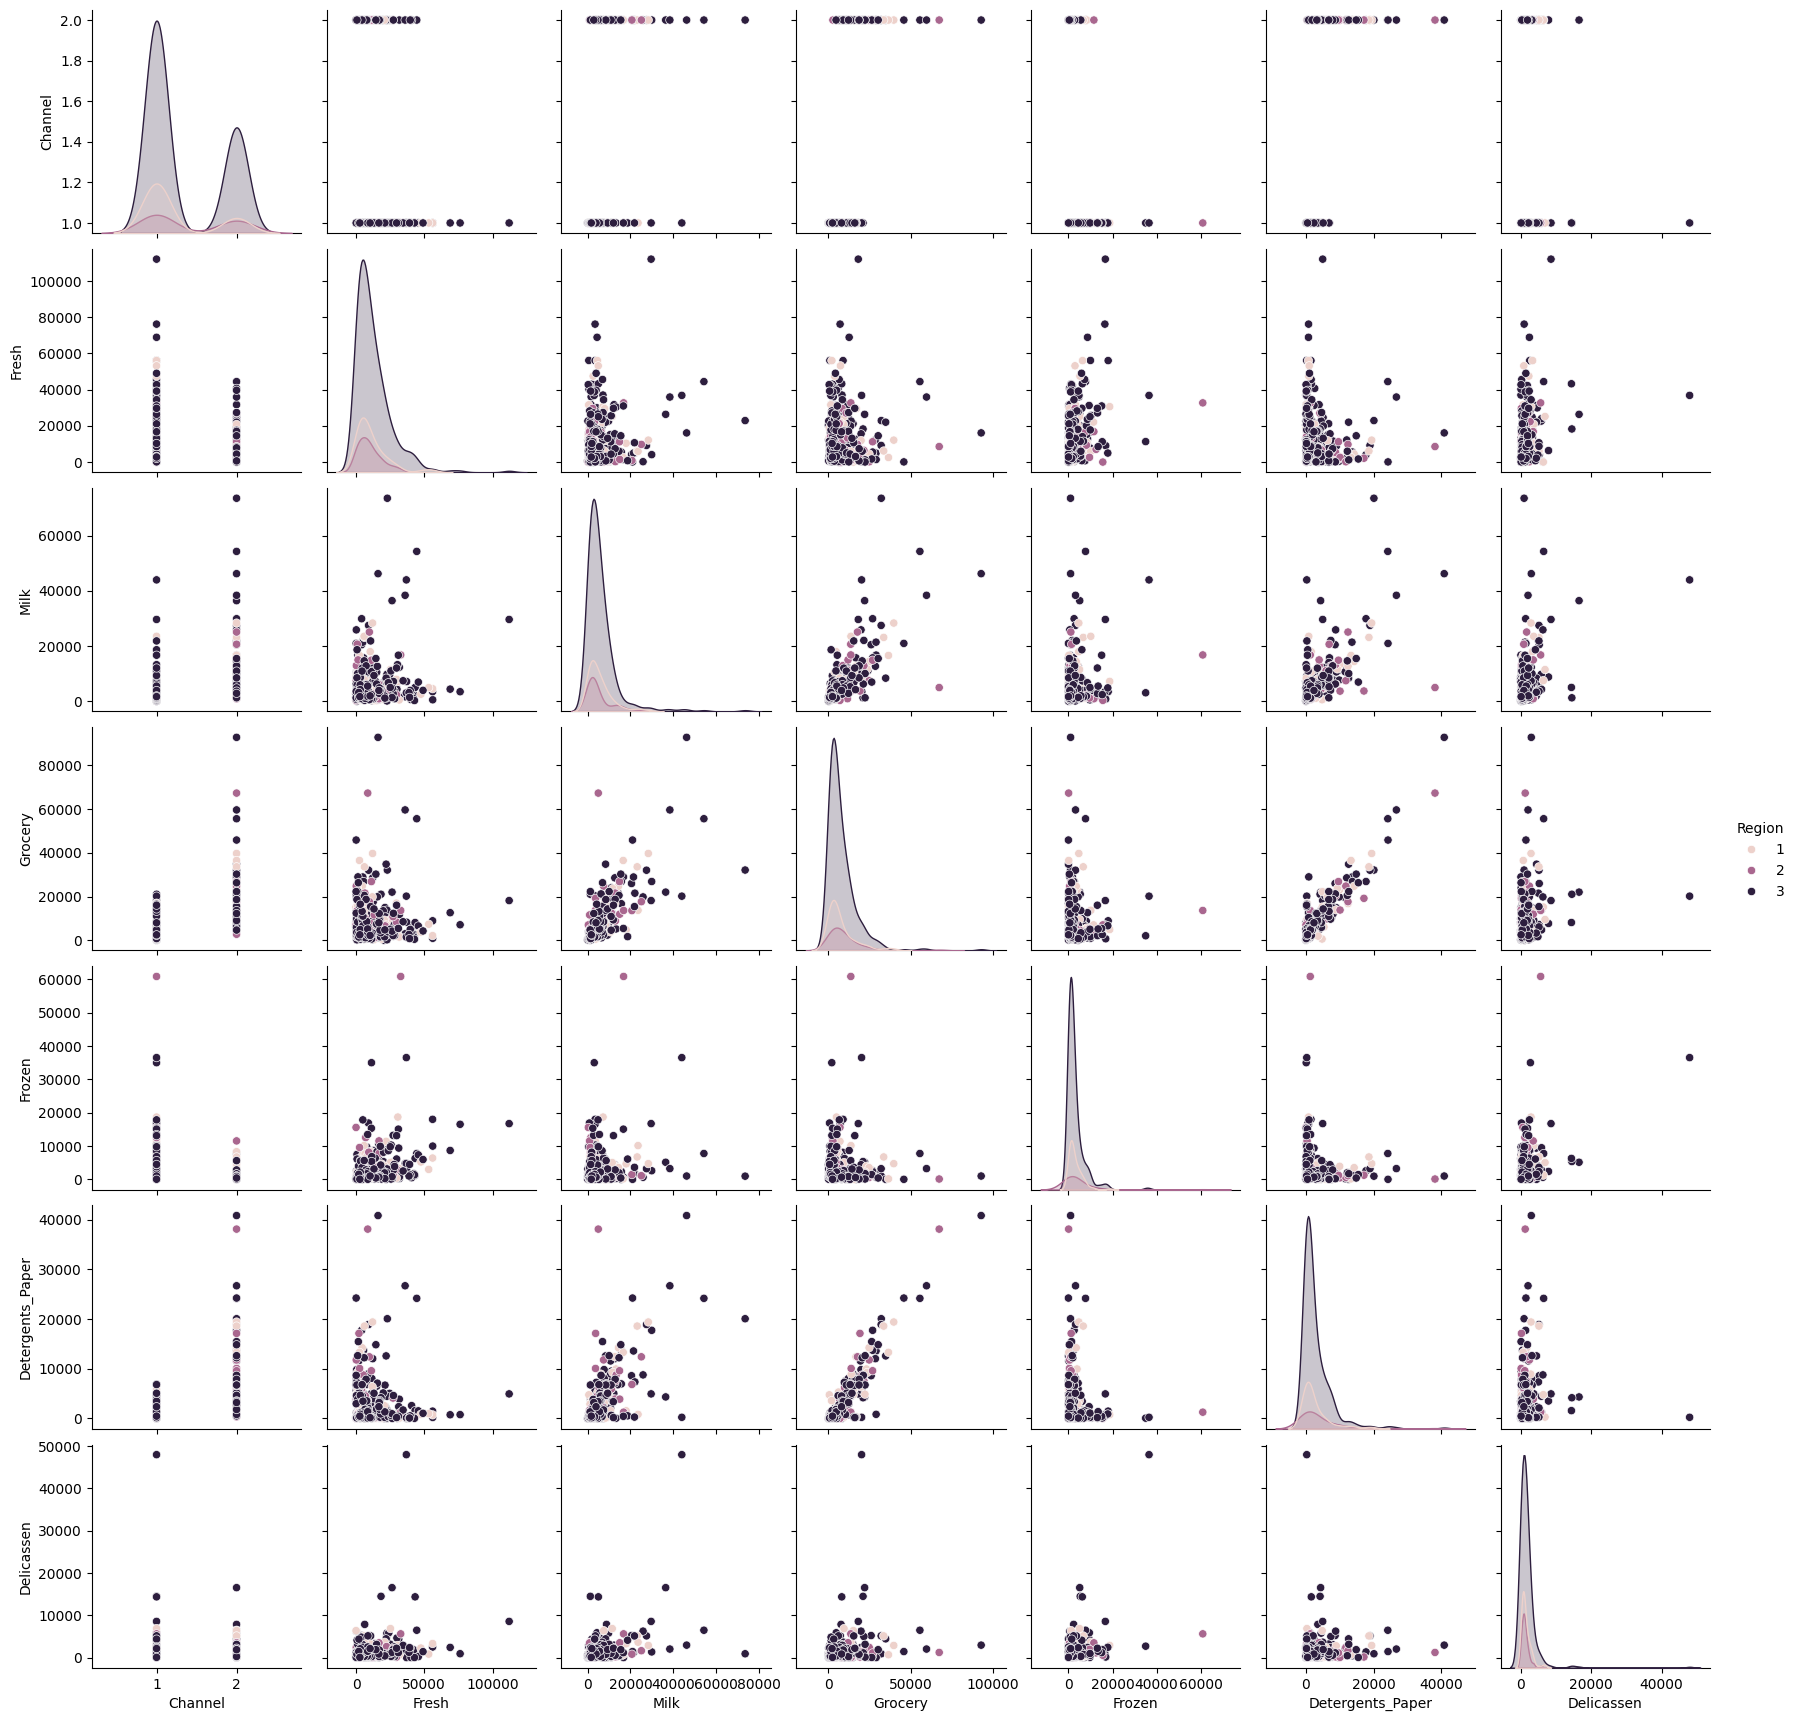

In [148]:
sns.pairplot(df, hue='Region')

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

nom_df = df[['Channel', 'Region']]
num_df = df.drop(columns=['Region', 'Channel'])

scaled_df= scaler.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled_df, columns=num_df.columns)

df = pd.concat([nom_df, scaled_df], axis=1)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [151]:
from sklearn.cluster import DBSCAN

In [152]:
num_feat = len(df.columns)
eps_vals = np.linspace(0.001, 3, 50)
outlier_log = []

for epsilon in eps_vals:
    model = DBSCAN(eps = epsilon, min_samples = 2 * num_feat)
    model.fit(df)
    
    num_outliers = np.sum(model.labels_ == -1)
    total_points = len(model.labels_)
    outlier_percent = (num_outliers / total_points) * 100

    print(f"Epsilon: {epsilon}, Outlier Percentage: {outlier_percent:.2f}%")
    outlier_log.append(outlier_percent)

outlier_df = pd.DataFrame({'Epsilon': eps_vals, 'Outlier Percentage': outlier_log})

Epsilon: 0.001, Outlier Percentage: 100.00%
Epsilon: 0.06220408163265306, Outlier Percentage: 100.00%
Epsilon: 0.12340816326530613, Outlier Percentage: 100.00%
Epsilon: 0.1846122448979592, Outlier Percentage: 100.00%
Epsilon: 0.24581632653061225, Outlier Percentage: 100.00%
Epsilon: 0.3070204081632653, Outlier Percentage: 96.14%
Epsilon: 0.3682244897959184, Outlier Percentage: 85.68%
Epsilon: 0.42942857142857144, Outlier Percentage: 81.82%
Epsilon: 0.4906326530612245, Outlier Percentage: 76.36%
Epsilon: 0.5518367346938776, Outlier Percentage: 73.64%
Epsilon: 0.6130408163265306, Outlier Percentage: 70.45%
Epsilon: 0.6742448979591836, Outlier Percentage: 65.00%
Epsilon: 0.7354489795918367, Outlier Percentage: 56.82%
Epsilon: 0.7966530612244899, Outlier Percentage: 47.95%
Epsilon: 0.8578571428571429, Outlier Percentage: 39.55%
Epsilon: 0.9190612244897959, Outlier Percentage: 32.50%
Epsilon: 0.980265306122449, Outlier Percentage: 27.95%
Epsilon: 1.041469387755102, Outlier Percentage: 23.64

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0, 0.5, 'Percentage of Outlier Points')

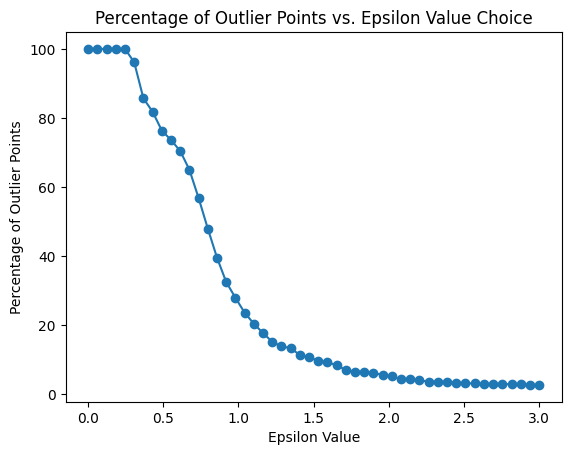

In [153]:
plt.plot(outlier_df['Epsilon'], outlier_df['Outlier Percentage'], marker='o')
plt.title('Percentage of Outlier Points vs. Epsilon Value Choice')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outlier Points')

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [154]:
model = DBSCAN(eps=0.5)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

In [155]:
labels = model.fit_predict(df)

<Axes: xlabel='Milk', ylabel='Grocery'>

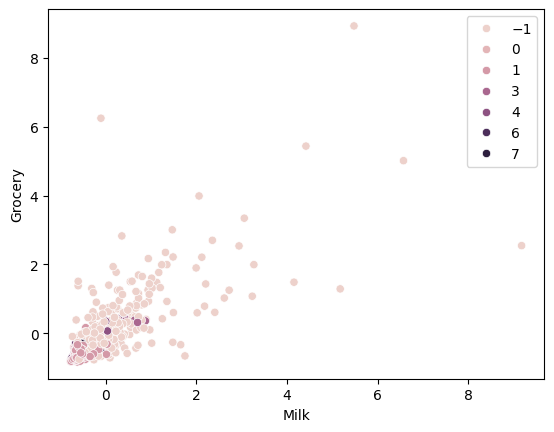

In [156]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue=labels)

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

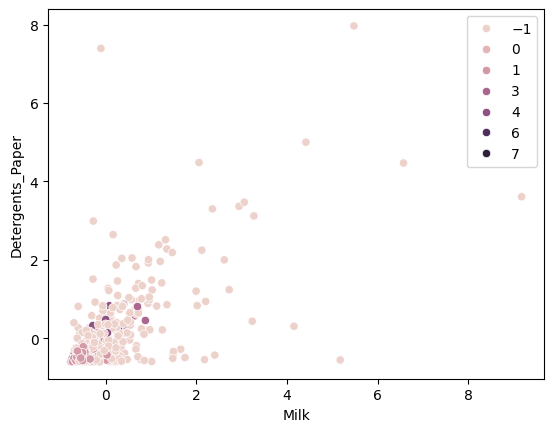

In [157]:
sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue=labels)

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [158]:
df['Labels'] = labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-1
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-1
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-1
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-1


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [159]:
clusters = df[df['Labels'] != -1].drop(columns=['Channel', 'Region'])
outliers = df[df['Labels'] == -1].drop(columns=['Channel', 'Region'])

cluster_mean = clusters.groupby('Labels').mean()
outlier_mean = outliers.groupby('Labels').mean()

compare_mean_df = pd.concat([cluster_mean, outlier_mean], keys=['Cluster', 'Outlier'])
compare_mean_df

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
        Labels                                                             
Cluster  0     -0.047439 -0.306575 -0.128764 -0.484978          0.142681   
         1     -0.227300 -0.533618 -0.582337 -0.193952         -0.500777   
         2      2.330913 -0.593472 -0.609298 -0.370277         -0.517654   
         3     -0.763329  0.600725  0.412071 -0.507786          0.608619   
         4     -0.707052  0.040639  0.253227 -0.428514          0.376715   
         5     -0.171174 -0.548618 -0.609922 -0.321448         -0.534924   
         6     -0.409825 -0.522690 -0.587695  0.764752         -0.523890   
         7     -0.356662 -0.577682 -0.481258 -0.102396         -0.557298   
Outlier -1      0.136885  0.347752  0.372203  0.149113          0.309780   

                Delicassen  
        Labels              
Cluster  0       -0.449668  
         1       -0.277938  
         2       -0.262725  
         3       -0.337985  
         4        0.107053  
         5       -0.303818  
         6       -0.323478  
         7       -0.207274  
Outlier -1        0.197238

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [160]:
from sklearn.preprocessing import MinMaxScaler

Text(50.722222222222214, 0.5, 'Clusters and Outliers')

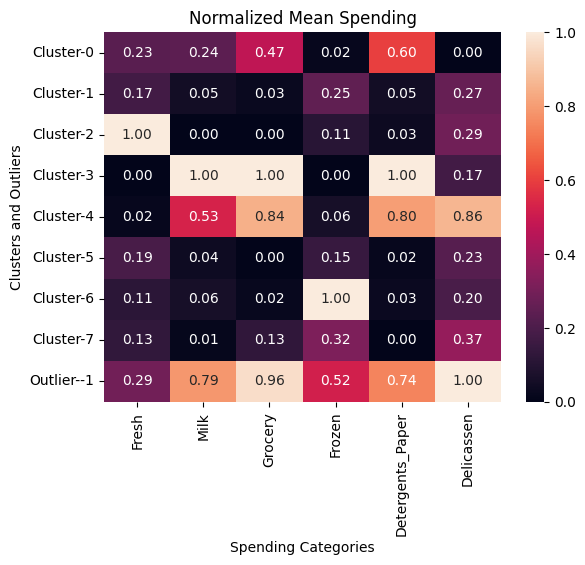

In [161]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(compare_mean_df)
normalized_df = pd.DataFrame(normalized_df, columns=compare_mean_df.columns, index=compare_mean_df.index)

sns.heatmap(normalized_df, annot=True, fmt=".2f")
plt.title('Normalized Mean Spending')
plt.xlabel('Spending Categories')
plt.ylabel('Clusters and Outliers')

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

Text(50.722222222222214, 0.5, 'Cluster')

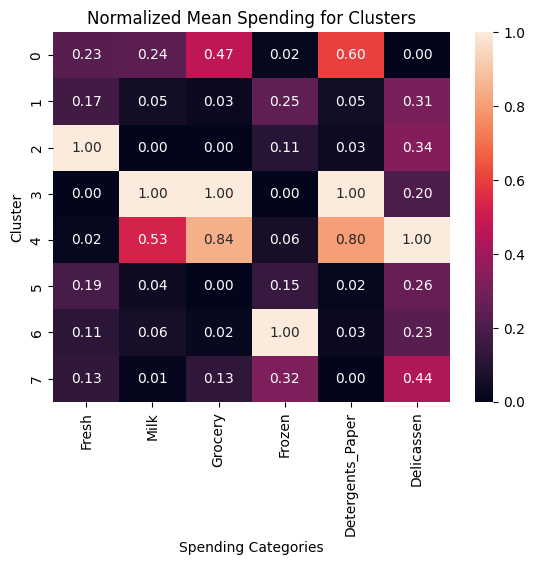

In [162]:
cluster_mean_norm= scaler.fit_transform(cluster_mean)
cluster_normalized_df = pd.DataFrame(cluster_mean_norm, columns=cluster_mean.columns, index=cluster_mean.index)

sns.heatmap(cluster_normalized_df, annot=True, fmt=".2f")
plt.title('Normalized Mean Spending for Clusters')
plt.xlabel('Spending Categories')
plt.ylabel('Cluster')

**TASK: What spending category were the two clusters mode different in?**

The values of the spending category Delicassen are different between the two previously generated heatmaps (specifically, between heatmaps with and without outliers).